In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

DATA_FILE = 'data/diamonds_short.xls'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
#loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 1, to minimize loss
optimizer = tf.train.AdamOptimizer(learning_rate=1).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
    i = 0
    while(i >= 0):
        total_loss = 0
        for x, y in data:
			# Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l

        if (i > 0):
            loss_diff = (last_loss/n_samples) - (total_loss/n_samples)
            print('Epoch {0}: {1} ,  Difference from last loss: {2}'.format(i, total_loss/n_samples, loss_diff))
            if (loss_diff < 100):
                i = -10
                break
            last_loss = total_loss
            i += 1
        elif (i == 0):
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
            last_loss = total_loss
            i += 1
            

	# close the writer when you're done using it
    writer.close() 
	
	# Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 0: 37784512.43515625
Epoch 1: 36614191.21851563 ,  Difference from last loss: 1170321.2166406214
Epoch 2: 35476568.52453125 ,  Difference from last loss: 1137622.6939843744
Epoch 3: 34379143.98789062 ,  Difference from last loss: 1097424.5366406292
Epoch 4: 33322461.7870166 ,  Difference from last loss: 1056682.2008740231
Epoch 5: 32305835.84554705 ,  Difference from last loss: 1016625.9414695501
Epoch 6: 31328235.12608345 ,  Difference from last loss: 977600.7194636017
Epoch 7: 30388508.767551117 ,  Difference from last loss: 939726.3585323319
Epoch 8: 29485473.51115796 ,  Difference from last loss: 903035.256393157
Epoch 9: 28617942.033888243 ,  Difference from last loss: 867531.4772697166
Epoch 10: 27784746.62566498 ,  Difference from last loss: 833195.4082232639
Epoch 11: 26984748.71158203 ,  Difference from last loss: 799997.9140829481
Epoch 12: 26216829.894226685 ,  Difference from last loss: 767918.8173553459
Epoch 13: 25479904.136971828 ,  Difference from last loss: 73692

Epoch 108: 8588997.759526366 ,  Difference from last loss: 42786.677150879055
Epoch 109: 8546429.84522461 ,  Difference from last loss: 42567.91430175677
Epoch 110: 8504077.25294922 ,  Difference from last loss: 42352.5922753904
Epoch 111: 8461933.903535156 ,  Difference from last loss: 42143.34941406362
Epoch 112: 8419997.237958984 ,  Difference from last loss: 41936.66557617113
Epoch 113: 8378262.660185547 ,  Difference from last loss: 41734.577773437835
Epoch 114: 8336730.247138672 ,  Difference from last loss: 41532.41304687504
Epoch 115: 8295394.499160157 ,  Difference from last loss: 41335.74797851499
Epoch 116: 8254250.436191406 ,  Difference from last loss: 41144.062968750484
Epoch 117: 8213299.679462891 ,  Difference from last loss: 40950.75672851503
Epoch 118: 8172540.053525391 ,  Difference from last loss: 40759.62593750004
Epoch 119: 8131966.490373535 ,  Difference from last loss: 40573.56315185595
Epoch 120: 8091581.684139404 ,  Difference from last loss: 40384.80623413063

Epoch 215: 5038456.251396485 ,  Difference from last loss: 24475.96214233339
Epoch 216: 5014133.408091431 ,  Difference from last loss: 24322.84330505412
Epoch 217: 4989963.211754151 ,  Difference from last loss: 24170.196337279864
Epoch 218: 4965944.446549683 ,  Difference from last loss: 24018.76520446781
Epoch 219: 4942078.462167969 ,  Difference from last loss: 23865.984381713904
Epoch 220: 4918359.9334143065 ,  Difference from last loss: 23718.528753662482
Epoch 221: 4894793.5941854855 ,  Difference from last loss: 23566.339228820987
Epoch 222: 4871373.986270752 ,  Difference from last loss: 23419.6079147337
Epoch 223: 4848106.673555298 ,  Difference from last loss: 23267.312715454027
Epoch 224: 4824986.654573364 ,  Difference from last loss: 23120.018981933594
Epoch 225: 4802018.556146851 ,  Difference from last loss: 22968.098426513374
Epoch 226: 4779195.715818939 ,  Difference from last loss: 22822.84032791201
Epoch 227: 4756519.772913818 ,  Difference from last loss: 22675.942

Epoch 322: 3203530.727692871 ,  Difference from last loss: 10936.197990722954
Epoch 323: 3192692.9594042967 ,  Difference from last loss: 10837.768288574181
Epoch 324: 3181952.699111328 ,  Difference from last loss: 10740.260292968713
Epoch 325: 3171306.9536279296 ,  Difference from last loss: 10645.745483398438
Epoch 326: 3160756.980029297 ,  Difference from last loss: 10549.973598632496
Epoch 327: 3150302.111884766 ,  Difference from last loss: 10454.868144531269
Epoch 328: 3139943.449760742 ,  Difference from last loss: 10358.662124023773
Epoch 329: 3129678.6224658205 ,  Difference from last loss: 10264.827294921502
Epoch 330: 3119504.8764648438 ,  Difference from last loss: 10173.746000976767
Epoch 331: 3109425.154301758 ,  Difference from last loss: 10079.722163085826
Epoch 332: 3099437.1392773436 ,  Difference from last loss: 9988.015024414286
Epoch 333: 3089541.2189013674 ,  Difference from last loss: 9895.920375976246
Epoch 334: 3079735.8908984377 ,  Difference from last loss: 

Epoch 430: 2478367.9468704555 ,  Difference from last loss: 3579.225489473436
Epoch 431: 2474829.4233604907 ,  Difference from last loss: 3538.5235099648125
Epoch 432: 2471331.7087873174 ,  Difference from last loss: 3497.714573173318
Epoch 433: 2467874.1285126684 ,  Difference from last loss: 3457.5802746489644
Epoch 434: 2464458.893803177 ,  Difference from last loss: 3415.2347094914876
Epoch 435: 2461082.408531036 ,  Difference from last loss: 3376.485272140708
Epoch 436: 2457745.5678752135 ,  Difference from last loss: 3336.8406558227725
Epoch 437: 2454448.39936676 ,  Difference from last loss: 3297.1685084532946
Epoch 438: 2451189.250167236 ,  Difference from last loss: 3259.149199523963
Epoch 439: 2447967.3472381784 ,  Difference from last loss: 3221.902929057833
Epoch 440: 2444784.628648819 ,  Difference from last loss: 3182.7185893594287
Epoch 441: 2441639.518314581 ,  Difference from last loss: 3145.1103342380375
Epoch 442: 2438531.302047631 ,  Difference from last loss: 3108.

Epoch 538: 2264886.5576857757 ,  Difference from last loss: 923.4900422790088
Epoch 539: 2263975.0314407405 ,  Difference from last loss: 911.5262450352311
Epoch 540: 2263075.6885389807 ,  Difference from last loss: 899.342901759781
Epoch 541: 2262188.82233469 ,  Difference from last loss: 886.8662042906508
Epoch 542: 2261312.6386127947 ,  Difference from last loss: 876.1837218953297
Epoch 543: 2260448.6658756067 ,  Difference from last loss: 863.9727371879853
Epoch 544: 2259596.109454002 ,  Difference from last loss: 852.5564216044731
Epoch 545: 2258754.462352982 ,  Difference from last loss: 841.6471010204405
Epoch 546: 2257924.286508865 ,  Difference from last loss: 830.1758441166021
Epoch 547: 2257105.1201170348 ,  Difference from last loss: 819.1663918304257
Epoch 548: 2256296.512201996 ,  Difference from last loss: 808.6079150387086
Epoch 549: 2255498.7453193665 ,  Difference from last loss: 797.7668826295994
Epoch 550: 2254711.973674469 ,  Difference from last loss: 786.77164489

Epoch 646: 2212784.3673146055 ,  Difference from last loss: 210.67477432265878
Epoch 647: 2212576.1066244505 ,  Difference from last loss: 208.26069015497342
Epoch 648: 2212370.595959091 ,  Difference from last loss: 205.5106653594412
Epoch 649: 2212168.6233935547 ,  Difference from last loss: 201.97256553638726
Epoch 650: 2211968.8675097656 ,  Difference from last loss: 199.75588378915563
Epoch 651: 2211772.0561252213 ,  Difference from last loss: 196.81138454424217
Epoch 652: 2211578.515943642 ,  Difference from last loss: 193.54018157953396
Epoch 653: 2211386.9033055496 ,  Difference from last loss: 191.61263809213415
Epoch 654: 2211198.285509701 ,  Difference from last loss: 188.6177958487533
Epoch 655: 2211012.431142769 ,  Difference from last loss: 185.8543669320643
Epoch 656: 2210828.3190345764 ,  Difference from last loss: 184.1121081924066
Epoch 657: 2210647.0543064214 ,  Difference from last loss: 181.2647281549871
Epoch 658: 2210468.524843688 ,  Difference from last loss: 17

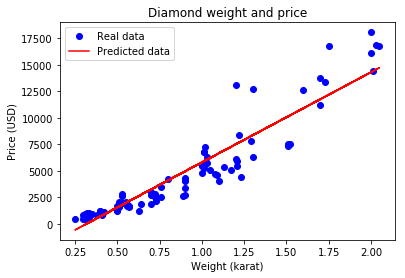

In [2]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.xlabel('Weight (karat)')
plt.ylabel('Price (USD)')
plt.title('Diamond weight and price')
plt.legend()
plt.show()